In [1]:
!python -m pip install yt-dlp

   ---------------------------------------- 0.0/3.3 MB ? eta -:--:--
   ---------------------------- ----------- 2.4/3.3 MB 12.2 MB/s eta 0:00:01
   ---------------------------------------- 3.3/3.3 MB 11.3 MB/s  0:00:00


In [1]:
import os
import pandas as pd
import subprocess

In [2]:
# Ruta al CSV de segmentos (ejemplo: balanced_train_segments.csv)
csv_file = "AudioSet/balanced_train_segments.csv"

df = pd.read_csv(
    csv_file,
    comment="#",  # ignora las líneas que empiezan con #
    header=None,
    names=["YTID", "start_seconds", "end_seconds", "positive_labels"],
    quotechar='"',
    skipinitialspace=True,  # elimina espacios después de las comas
    engine="python"
)

print(df.head())


          YTID  start_seconds  end_seconds             positive_labels
0  --PJHxphWEs           30.0         40.0         /m/09x0r,/t/dd00088
1  --ZhevVpy1s           50.0         60.0                   /m/012xff
2  --aE2O5G5WE            0.0         10.0  /m/03fwl,/m/04rlf,/m/09x0r
3  --aO5cdqSAg           30.0         40.0       /t/dd00003,/t/dd00005
4  --aaILOrkII          200.0        210.0         /m/032s66,/m/073cg4


In [7]:
import os
import pandas as pd
import subprocess

base_dir = "audioset_esc"
os.makedirs(base_dir, exist_ok=True)

relevant_classes = {
    "Chainsaw": "/m/01j4z9",
    "Fire": "/m/02_41",
    "Fireworks": "/m/0g6b5",
    "Firecracker": "/g/122z_qxw",
    "Vehicle Engine": "/m/07yv9",
    "Bird": "/m/015p6",
    "Insect": "/m/03vt0",
    "Wind": "/m/03m9d0z",
    "Rain": "/m/06mb1",
    "Thunder": "/m/0ngt1",
    "Natural Sound": "/m/059j3w",
    "Splinter": "/m/07pl1bw",
    "Stream": "/m/0j6m2",
    "Rustling leaves": "/m/09t49"
    
}

# Ruta al CSV descargado de AudioSet
csv_path = "AudioSet/balanced_train_segments.csv"

# Leer CSV oficial
df = pd.read_csv(
    csv_file,
    comment="#",  # ignora las líneas que empiezan con #
    header=None,
    names=["YTID", "start_seconds", "end_seconds", "positive_labels"],
    quotechar='"',
    skipinitialspace=True,  # elimina espacios después de las comas
    engine="python"
)

# Filtrar solo nuestras clases relevantes
mask = df["positive_labels"].apply(lambda x: any(c in x for c in relevant_classes.values()))
filtered_df = df[mask]

# Guardar solo las clases que nos interesan
filtered_df.to_csv("audioset_esc/filtered_audioset.csv", index=False)
print(f"✅ CSV filtrado guardado con {len(filtered_df)} fragmentos")

save_dir = "audioset_esc"
os.makedirs(save_dir, exist_ok=True)

for _, row in filtered_df.iterrows():
    ytid = row["YTID"]
    start = row["start_seconds"]
    end = row["end_seconds"]
    labels = row["positive_labels"]

    url = f"https://www.youtube.com/watch?v={ytid}"
    out_file = os.path.join(save_dir, f"{ytid}_{start}_{end}.wav")

    # Saltar si ya existe
    if os.path.exists(out_file):
        continue

    try:
        result = subprocess.run([
            "yt-dlp", "--quiet", "--no-warnings",
            "-x", "--audio-format", "wav",
            "--download-sections", f"*{start}-{end}",
            "-o", out_file, url
        ], capture_output=True, text=True)

        if result.returncode != 0:
            print(f"⚠️ Error con {ytid}: {result.stderr}")
    except Exception as e:
        print(f"Error con {ytid}: {e}")


✅ CSV filtrado guardado con 1852 fragmentos
⚠️ Error con -Uw2HHni78U: ERROR: [youtube] -Uw2HHni78U: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.

⚠️ Error con -aC8TJIZrtE: ERROR: [youtube] -aC8TJIZrtE: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.

⚠️ Error con -d6ytV5GfH4: ERROR: [youtube] -d6ytV5GfH4: Video unavailable

⚠️ Error con -s9kwrRilOY: ERROR: [youtube] -s9kwrRilOY: Private video. Sign in if you've been granted access to this video. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies

⚠️ Error con -wfRMEaJkRk: ERROR: [youtube] -wfRMEaJkRk: Video unavaila

In [2]:
import pandas as pd
import os

# Rutas
input_csv = "audioset_esc/filtered_audioset.csv"
output_csv = "dataset_Audiotest.csv"
audio_dir = "audioset_esc"

# Diccionario de clases relevantes
relevant_classes = {
    "Chainsaw": "/m/01j4z9",
    "Fire": "/m/02_41",
    "Fireworks": "/m/0g6b5",
    "Firecracker": "/g/122z_qxw",
    "Vehicle Engine": "/m/07yv9",
    "Bird": "/m/015p6",
    "Insect": "/m/03vt0",
    "Wind": "/m/03m9d0z",
    "Rain": "/m/06mb1",
    "Thunder": "/m/0ngt1",
    "Natural Sound": "/m/059j3w",
    "Splinter": "/m/07pl1bw",
    "Stream": "/m/0j6m2",
    "Rustling leaves": "/m/09t49"
}

# Invertir diccionario: {id -> nombre_clase}
id_to_label = {v: k for k, v in relevant_classes.items()}

# Leer el CSV filtrado
df = pd.read_csv(input_csv)

dataset_rows = []
id_counter = 0

for _, row in df.iterrows():
    ytid = row["YTID"]
    start = int(row["start_seconds"])
    end = int(row["end_seconds"])
    labels = row["positive_labels"].split(",")

    # Nombre de archivo esperado
    filename = f"{ytid}_{start}_{end}.wav"

    # Buscar si alguna etiqueta coincide con las clases relevantes
    matched = [id_to_label[label] for label in labels if label in id_to_label]

    if matched:  # si hay alguna clase relevante
        for label in matched:  # (algunos fragmentos tienen múltiples clases)
            dataset_rows.append([id_counter, filename, label])
            id_counter += 1

# Crear DataFrame final
final_df = pd.DataFrame(dataset_rows, columns=["ID", "filename", "label"])

# Guardar CSV
final_df.to_csv(output_csv, index=False)
print(f"✅ Dataset generado: {output_csv} con {len(final_df)} registros")


✅ Dataset generado: dataset_Audiotest.csv con 1976 registros


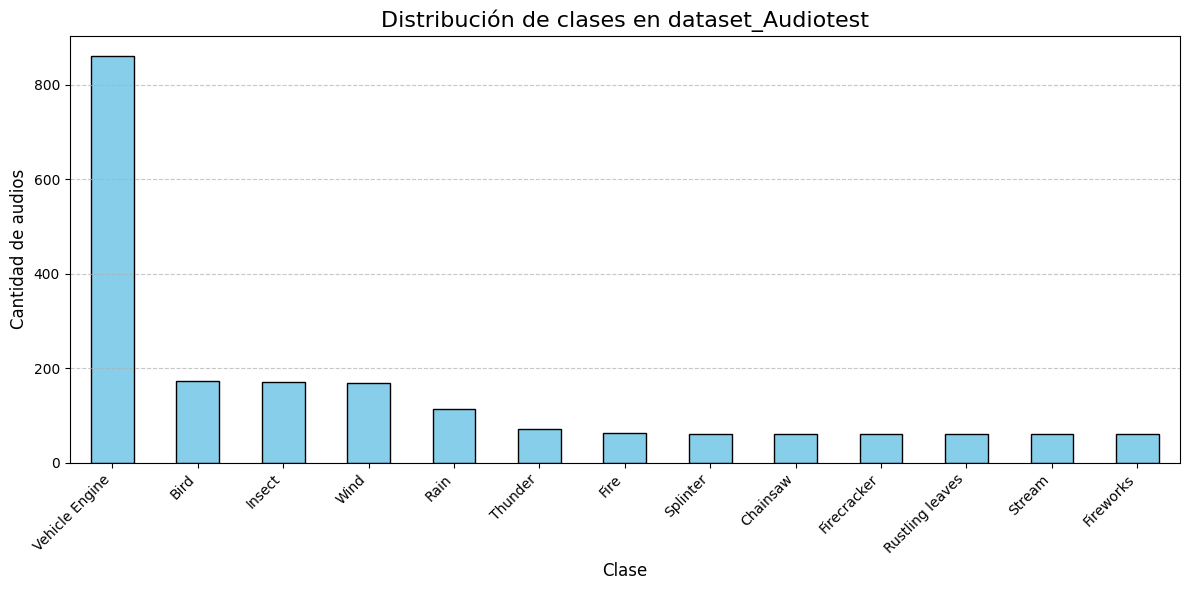

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el dataset generado
csv_file = "dataset_Audiotest.csv"
df = pd.read_csv(csv_file)

# Contar ocurrencias de cada clase
class_counts = df["label"].value_counts()

# Graficar
plt.figure(figsize=(12,6))
class_counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Distribución de clases en dataset_Audiotest", fontsize=16)
plt.xlabel("Clase", fontsize=12)
plt.ylabel("Cantidad de audios", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

In [1]:
import os
import pandas as pd
import subprocess

# Carpeta de salida
save_dir = "AudioSet_wavfiles"
os.makedirs(save_dir, exist_ok=True)

# Diccionario de clases (etiqueta oficial -> nombre final)
relevant_classes = {
    "/m/015p6": "birdchirping",
    "/m/0912c9": "carhorn",
    "/m/01j4z9": "chainsaw",
    "/m/02_41": "fire",
    "/m/09xqv": "crickets",
    "/m/02mk9": "engine",
    "/m/0g6b5": "firework",
    "/g/122z_qxw": "firecracker",
    "/m/07pbtc8": "footsteps",
    "/m/09ld4": "frog",
    "/m/01b82r": "handsaw",
    "/m/09ct_": "helicopter",
    "/m/03vt0": "insect",
    "/m/06mb1": "rain",
    "/m/028v0c": "silence",
    "/m/05zppz": "speaking",
    "/m/02zsn": "speaking",
    "/m/0jb2l": "thunderstorm",
    "/m/07r10fb": "waterdrops",
    "/m/03m9d0z": "wind",
    "/m/05_wcq": "wingflaping",
    "/m/083vt": "woodchop",
    "/m/0j6m2": "stream",
    "/m/09t49": "rustlingleaves",
}

# Excepciones que no tienen límite de 50
no_limit_classes = {"stream", "rustlingleaves", "firecracker"}

# CSV original de AudioSet
csv_path = "AudioSet/balanced_train_segments.csv"

# Leer CSV oficial de AudioSet
df = pd.read_csv(
    csv_path,
    comment="#",
    header=None,
    names=["YTID", "start_seconds", "end_seconds", "positive_labels"],
    quotechar='"',
    skipinitialspace=True,
    engine="python"
)

# Filtrar solo las clases relevantes
mask = df["positive_labels"].apply(lambda x: any(c in x for c in relevant_classes.keys()))
filtered_df = df[mask]

# Expandir filas: un fragmento puede tener varias etiquetas -> duplicar
expanded_rows = []
for _, row in filtered_df.iterrows():
    for class_id, label in relevant_classes.items():
        if class_id in row["positive_labels"]:
            expanded_rows.append({
                "YTID": row["YTID"],
                "start_seconds": row["start_seconds"],
                "end_seconds": row["end_seconds"],
                "label": label
            })

filtered_df = pd.DataFrame(expanded_rows)

# Limitar a 50 por clase (excepto excepciones)
limited_df = pd.concat([
    group if label in no_limit_classes else group.head(50)
    for label, group in filtered_df.groupby("label")
])

# CSV de salida
csv_out = os.path.join(save_dir, "Audioset.csv")
records = []

for idx, row in enumerate(limited_df.itertuples(), 1):
    ytid = row.YTID
    start = row.start_seconds
    end = row.end_seconds
    label = row.label

    filename = f"{ytid}_{start}_{end}_{label}.wav"
    out_file = os.path.join(save_dir, filename)

    # Saltar si ya existe
    if not os.path.exists(out_file):
        url = f"https://www.youtube.com/watch?v={ytid}"
        try:
            result = subprocess.run([
                "yt-dlp", "--quiet", "--no-warnings",
                "-x", "--audio-format", "wav",
                "--download-sections", f"*{start}-{end}",
                "-o", out_file, url
            ], capture_output=True, text=True)

            if result.returncode != 0:
                print(f"⚠️ Error con {ytid}: {result.stderr}")
                continue
        except Exception as e:
            print(f"❌ Error con {ytid}: {e}")
            continue

    records.append([idx, filename, label])

# Guardar CSV final
pd.DataFrame(records, columns=["ID", "filename", "label"]).to_csv(csv_out, index=False)
print(f"✅ Descarga terminada. CSV guardado en {csv_out} con {len(records)} audios.")


⚠️ Error con -aC8TJIZrtE: ERROR: [youtube] -aC8TJIZrtE: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.

⚠️ Error con 4WeaBRG7W-c: ERROR: [youtube] 4WeaBRG7W-c: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies

⚠️ Error con 65l9DPdEDuk: ERROR: [youtube] 65l9DPdEDuk: Video unavailable

⚠️ Error con 6eE83gQGrFg: ERROR: [youtube] 6eE83gQGrFg: Private video. Sign in if you've been granted access to this video. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pas

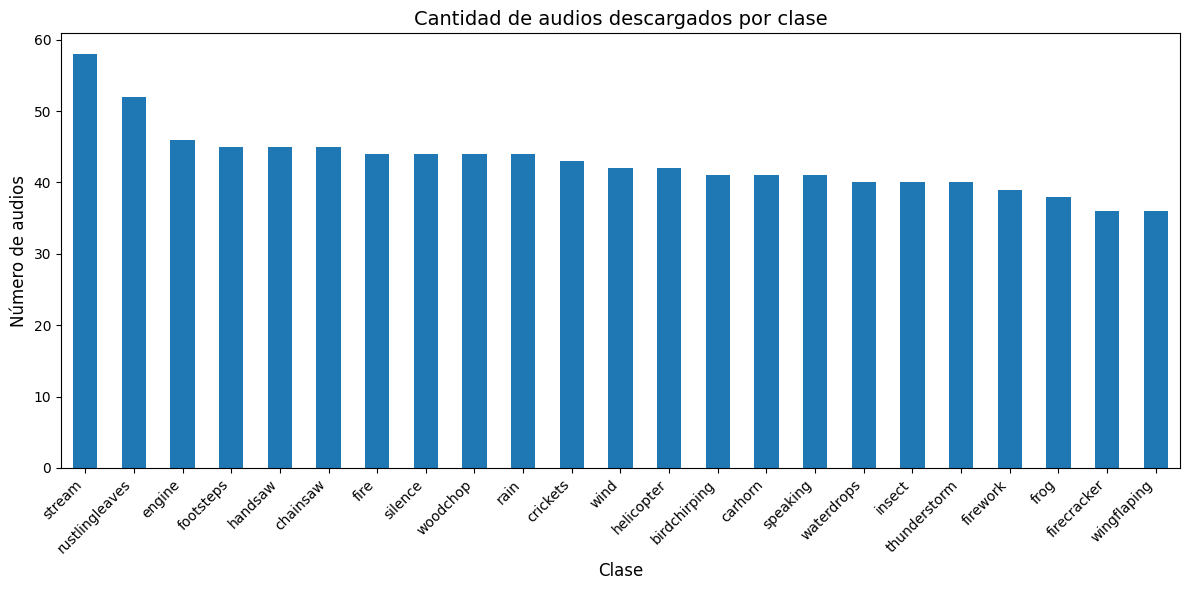

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el CSV generado
csv_path = "AudioSet_wavfiles/Audioset.csv"
df = pd.read_csv(csv_path)

# Contar audios por clase
counts = df["label"].value_counts()

# Gráfico de barras
plt.figure(figsize=(12, 6))
counts.plot(kind="bar")

plt.title("Cantidad de audios descargados por clase", fontsize=14)
plt.xlabel("Clase", fontsize=12)
plt.ylabel("Número de audios", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
